# The Sparks Foundation GRIP -April 2022
## Role-Data Science and Business Analytics Intern
## Author-Hanmant Rotte
## Task 1=Prediction using Supervised ML
## Problem statement:What will be the predicted score if the student studies for 9.25 hr/day?
## Dataset link=http://bit.ly/w-data

# Import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline

# Reading the data from URL

In [2]:
data=pd.read_csv("http://bit.ly/w-data")
print("Data imported successfully")
data.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Getting the information of data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
data.shape

(25, 2)

# Plotting the data

In [ ]:
# Plotting the distribution of scores
data.plot(x='Hours',y='Scores',style='o')
plt.title('Hours vs Percentage',fontsize=24)
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage scores')
plt.show()

# Preparing the data
Dividing the data into attributes and labels

In [7]:
x=data.iloc[:, :-1].values  
y=data.iloc[:, 1].values

In [8]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [9]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

# Dividing the data into training and testing set
By using train_test_split() method we can split this data into training and testing set.

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

# Training the algorithm

In [11]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
model = reg.fit(x_train,y_train)
print("Training complete!")

Training complete!


# Plotting the regression line

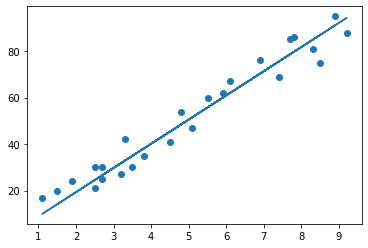

In [12]:
line = reg.coef_*x+reg.intercept_
plt.scatter(x, y)
plt.plot(x,line);
plt.show()

In [13]:
print(x_test) # Testing data - In Hours
y_pred = model.predict(x_test) # Predicting the scores

[[1.1]
 [3.3]
 [1.9]
 [8.5]
 [4.8]
 [7.7]
 [6.1]
 [7.4]]


In [14]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,17,9.939530
1,42,32.843201
2,24,18.268138
3,75,86.979152
4,54,48.459341
5,85,78.650544
6,67,61.993329
7,69,75.527316


# Coefficients

In [15]:
from sklearn.metrics import r2_score
# Calculating the R Squared 
r_squared = r2_score(y_test, y_pred)

print('R Squared :', r_squared)

R Squared : 0.8933827573294114


In [16]:
# Using the classic method to calculate the Adjacent R Squared
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1)

print("Adjacent R Squared :", adjusted_r_squared)

Adjacent R Squared : 0.8887472250393859


# Making predictions

In [17]:
print(x_test) #Testing data in Hours
y_pred = reg.predict(x_test) #Predicting the scores

[[1.1]
 [3.3]
 [1.9]
 [8.5]
 [4.8]
 [7.7]
 [6.1]
 [7.4]]


# Comparing Actual vs Predicted

In [18]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,17,9.939530
1,42,32.843201
2,24,18.268138
3,75,86.979152
4,54,48.459341
5,85,78.650544
6,67,61.993329
7,69,75.527316


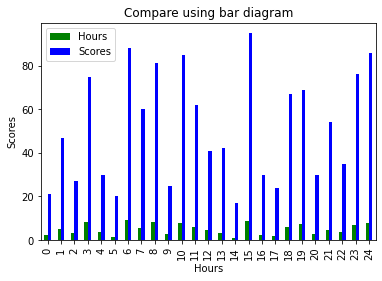

In [19]:
#comparing using bar diagram
data.plot(kind="bar",color=('g','b'))
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Compare using bar diagram")
plt.show()

# What will be the predicted score if the student studies for 9.25 hr/day?
# Predicting the score for 9.25 hours

In [20]:
hours= 9.25
pred=reg.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = 9.25
Predicted Score = 94.78722212956563


# Evaluating the model

In [21]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 7.169048271425507


# From our linear regression model,If students study for 9.25 hours/day they will score '94.65' marks.

# Thank you...